# Fundementals of Data Analysis Practical Assignment Anscombes Quartet

Anscombes Quartet demonstates the danger in summary statistics and why it always a good idea to plot your data It comprises of a table of four datasets of apparently similar data.

## Background of the Dataset

### Who created the dataset?

![Frank Anscombe](https://github.com/ConorHogan/FODA-Practical-Assignment/blob/master/FODA-Images/Anscombe.gif)

Anscombe's Dataset was created by Francis (Frank) Anscombe, an English statistician who was educated at and later lectured at Cambridge University. He later moved to Princeton University and then went on to become the founding chairman of the statistics department at Yale University. 

Conveniently, the Python graphing package Seaborn has Anscombes Quartet in it's library of datasets by default.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import linear_model

In [2]:
# Load the example dataset for Anscombe's quartet
anscombedf = sns.load_dataset("anscombe")

print(anscombedf)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [3]:
anscombedf.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [28]:
anscombedf.mode()

,x,y
0,8.0,8.84


In [29]:
anscombedf.median()

x    8.00
y    7.52
dtype: float64

In [30]:
anscombedf.kurtosis()

x    0.835279
y    0.908602
dtype: float64

In [31]:
anscombedf.skew()

x    0.736875
y    0.439346
dtype: float64

Corrolation matrix

In [8]:
anscombedf.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


Covariance Matrix

In [9]:
anscombedf.cov()

,x,y
x,10.232558,5.115581
y,5.115581,3.837388


### Plot Normal Distribution

X MEAN: 9.0 X STD: 3.1622776601683795


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


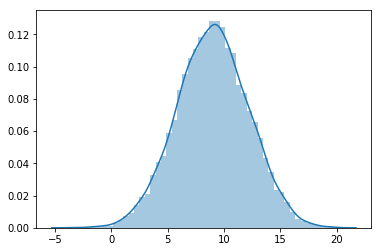

In [10]:
from scipy.stats import norm

norm_X= anscombedf["x"].values
mu, std = norm.fit(norm_X) # norm.fit returns the mean and standard deviation to create the normal distribution
print("X MEAN:",mu ,"X STD:",std)

x = np.random.normal(mu, std, 10000)
sns.distplot(x, hist=True)


Y MEAN: 7.500681818181818 Y STD: 1.9365367373545919


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


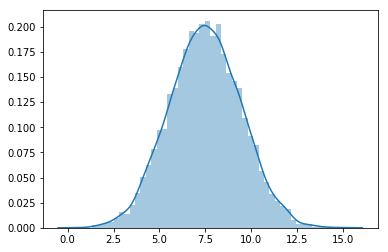

In [11]:
norm_Y = anscombedf["y"].values
mu, std = norm.fit(norm_Y) # norm.fit returns the mean and standard deviation to create the normal distribution
print("Y MEAN:",mu ,"Y STD:",std)

x = np.random.normal(mu, std, 10000)
sns.distplot(x, hist=True)

### Performing linear regression on dataset.

In [12]:
#shuffle dataset before training

shuffled_df = anscombedf.iloc[np.random.permutation(len(anscombedf))]
shuffled_df

,dataset,x,y
43,IV,8.0,6.89
26,III,11.0,7.81
28,III,6.0,6.08
19,II,12.0,9.13
12,II,8.0,8.14
31,III,7.0,6.42
23,III,8.0,6.77
4,I,11.0,8.33
32,III,5.0,5.73
8,I,12.0,10.84


In [13]:
# split df into x and y 

reg_X = shuffled_df["x"].values
reg_Y = shuffled_df["y"].values

#Reshape Arrays
reg_X = reg_X.reshape(len(reg_X),1)
reg_Y = reg_Y.reshape(len(reg_Y),1)
# take a training sample

train_X = reg_X[:22]
train_Y = reg_Y[:22]

# take a testing sample for later
test_X = reg_X[:-22]
test_Y = reg_Y[:-22]

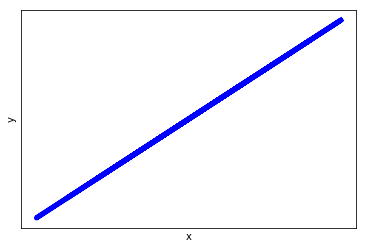

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(train_X, train_Y)

#plt.scatter(test_X, test_Y,  color='black')
plt.plot(test_X, regr.predict(test_X), color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Looking at the results for the linear regression you would assume that the x and y values in each of the datasets and the combined dataset as a whole are positive corrolated, meaning that as x increases y increases.

### Summary statistics for the subdatasets

Set the "dataset" column as the index to allow for creation of subset dataframes.

In [15]:
anscombedf.set_index("dataset", inplace=True)


Group into invidual datasheet based on dataset column values.

In [16]:
Idf = anscombedf.loc["I"]
IIdf = anscombedf.loc["II"]
IIIdf = anscombedf.loc["III"]
IVdf = anscombedf.loc["IV"]

Display tables side by side. Function taken from: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [17]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [18]:
display_side_by_side(Idf,IIdf,IIIdf,IVdf)

,x,y
dataset,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33
I,14.0,9.96
I,6.0,7.24
I,4.0,4.26
I,12.0,10.84


Show summary statistics for each subset dataframe and compare and contrast.

In [19]:
display_side_by_side(Idf.describe(),IIdf.describe(),IIIdf.describe(),IVdf.describe())

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000
,x,y
count,11.000000,11.000000


Given that the standard deviation and mean are almost identical for each dataset for x and y, the probabilty distribution functions would appear the same as for the dataset as a whole when charted. I'll spare you charting this 8 times.

In [42]:
display_side_by_side(Idf.mode(),IIdf.mode(),IIIdf.mode(),IVdf.mode())

,x,y
0,4.0,4.26
1,5.0,4.82
2,6.0,5.68
3,7.0,6.95
4,8.0,7.24
5,9.0,7.58
6,10.0,8.04
7,11.0,8.33
8,12.0,8.81
9,13.0,9.96


Display corrolation coefficient side by side.

In [21]:
display_side_by_side(Idf.corr(),IIdf.corr(),IIIdf.corr(),IVdf.corr())

,x,y
x,1.000000,0.816421
y,0.816421,1.000000
,x,y
x,1.000000,0.816237
y,0.816237,1.000000
,x,y
x,1.000000,0.816287
y,0.816287,1.000000
,x,y
x,1.000000,0.816521


Display covariance coefficient side by side

In [22]:
display_side_by_side(Idf.cov(),IIdf.cov(),IIIdf.cov(),IVdf.cov())

,x,y
x,11.000,5.501000
y,5.501,4.127269
,x,y
x,11.0,5.500000
y,5.5,4.127629
,x,y
x,11.000,5.49700
y,5.497,4.12262
,x,y
x,11.000,5.499000


In [40]:
med_Idf = pd.DataFrame(Idf.median())
med_IIdf = pd.DataFrame(IIdf.median())
med_IIIdf = pd.DataFrame(IIIdf.median())
med_IVdf = pd.DataFrame(IVdf.median())
display_side_by_side(med_Idf,med_IIdf,med_IIIdf,med_IVdf)

,0
x,9.00
y,7.58
,0
x,9.00
y,8.14
,0
x,9.00
y,7.11
,0
x,8.00


In [39]:
kurt_Idf = pd.DataFrame(Idf.kurtosis())
kurt_IIdf = pd.DataFrame(IIdf.kurtosis())
kurt_IIIdf = pd.DataFrame(IIIdf.kurtosis())
kurt_IVdf = pd.DataFrame(IVdf.kurtosis())
display_side_by_side(kurt_Idf,kurt_IIdf,kurt_IIIdf,kurt_IVdf)

,0
x,-1.200000
y,-0.534898
,0
x,-1.200000
y,0.846123
,0
x,-1.200000
y,4.384089
,0
x,11.000000


In [43]:
skew_Idf = pd.DataFrame(Idf.skew())
skew_IIdf = pd.DataFrame(IIdf.skew())
skew_IIIdf = pd.DataFrame(IIIdf.skew())
skew_IVdf = pd.DataFrame(IVdf.skew())
display_side_by_side(skew_Idf, skew_IIdf, skew_IIIdf, skew_IVdf)

,0
x,0.000000
y,-0.065036
,0
x,0.000000
y,-1.315798
,0
x,0.000000
y,1.855495
,0
x,3.316625


## Plotting Dataset to Show Differences

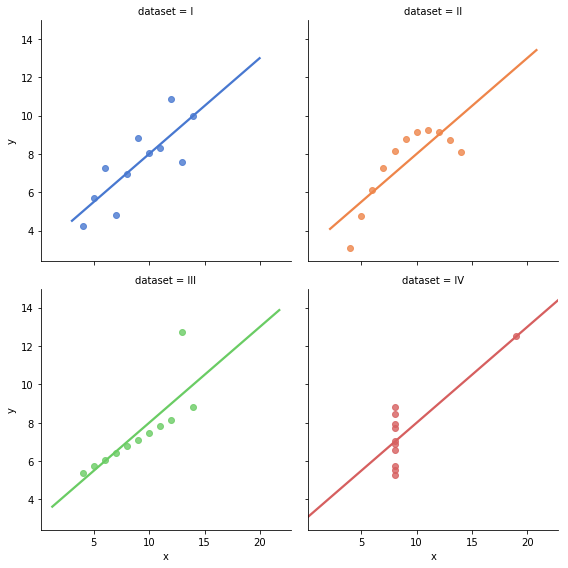

In [23]:
reset = anscombedf.reset_index()
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=reset,
           col_wrap=2, ci=None, palette="muted", height=4)

Outliers in III and IV give a false impression of correlation between x and y.

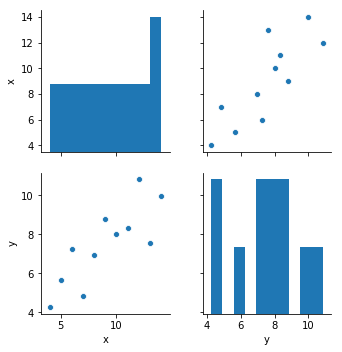

In [24]:
Idfpairplot = sns.pairplot(Idf)
plt.show(Idfpairplot)

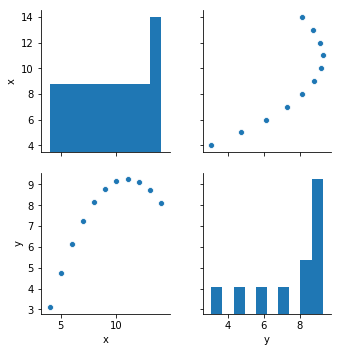

In [25]:
IIdfpairplot = sns.pairplot(IIdf)
plt.show(IIdfpairplot)

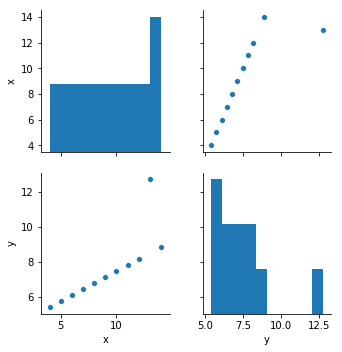

In [26]:
IIIdfpairplot = sns.pairplot(IIIdf)
plt.show(IIIdfpairplot)

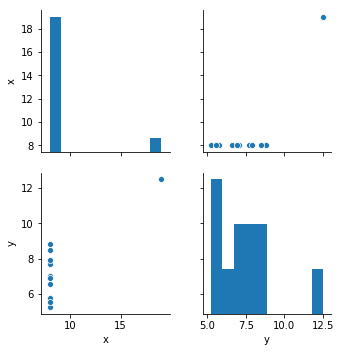

In [27]:
IVdfpairplot = sns.pairplot(IVdf)
plt.show(IVdfpairplot)